# Multiple Linear Regression, Part 1: 

## Feature Scaling and Model Assumptions

AKA - Topic 19 is too big to fit into one study group! We'll do part 1 today, focused on how we can better interpret the results of a linear regression model that includes multiple features, as well as some things to check to make sure our models are reliable.

### First: Set Up

In [1]:
# Basic imports

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

Credit data from https://www.kaggle.com/avikpaul4u/credit-card-balance

Target: `Balance`

In [2]:
# Data
df = pd.read_csv('data/Credit.csv', 
                 usecols=['Income', 'Limit', 'Rating', 'Age', 'Balance'])

In [3]:
df.head()

,Income,Limit,Rating,Age,Balance
0,14.891,3606,283,34,333
1,106.025,6645,483,82,903
2,104.593,7075,514,71,580
3,148.924,9504,681,36,964
4,55.882,4897,357,68,331


In [4]:
df.describe()

,Income,Limit,Rating,Age,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,55.667500,520.015000
std,35.244273,2308.198848,154.724143,17.249807,459.758877
min,10.354000,855.000000,93.000000,23.000000,0.000000
25%,21.007250,3088.000000,247.250000,41.750000,68.750000
50%,33.115500,4622.500000,344.000000,56.000000,459.500000
75%,57.470750,5872.750000,437.250000,70.000000,863.000000
max,186.634000,13913.000000,982.000000,98.000000,1999.000000


## Multiple Linear Regression

Same as simple linear regression, but with more inputs!

In [5]:
# Let's start with statsmodels
import statsmodels.api as sm

In [6]:
# Define our X and y

# neat trick
X_cols = [c for c in df.columns.to_list() if c not in ['Balance']]
# same as
# X = df.drop('Balance')

X = df[X_cols]
y = df['Balance']

In [7]:
model = sm.OLS(y, sm.add_constant(X))

In [8]:
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     705.6
Date:                Tue, 18 May 2021   Prob (F-statistic):          2.16e-178
Time:                        10:35:52   Log-Likelihood:                -2599.9
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     395   BIC:                             5230.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -445.1048     40.576    -10.970      0.000    -524.877    -365.332
Income        -7.6127      0.382    -19.945      0.000      -8.363      -6.862
Limit          0.0818      0.045      1.834      0.067      -0.006       0.170
Rating         2.7314      0.664      4.111      0.000       1.425       4.038
Age           -0.8561      0.478     -1.789      0.074      -1.797       0.084
==============================================================================
Omnibus:                       94.733   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.919
Skew:                           1.374   Prob(JB):                     9.36e-37
Kurtosis:                       4.550   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observation time!

How'd we do? What looks different from the simple linear regression output? What in the world can we do with those coefficients?

- score is good, can point out the warning for the condition number, also can talk through how coefficients are working but how you can't understand these things against each other yet (can't directly compare to see which one is 'more' influential without scaling)


## Standardization, AKA Feature Scaling and Centering

Scaling data is the process of **increasing or decreasing the magnitude according to a fixed ratio.** You change the size but not the shape of the data. Often, this involves divivding features by their standard deviation.

Centering also does not change the shape of the data, but instead simply **removes the mean value  of each feature** so that each is centered around zero instead of their original mean.

The idea is that you can standardize data to be comparable, so that a model can interpret each individual feature more consistently.

NOTE: Feature Scaling is **NOT** the same as normalization!

Documentation: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

#### [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

The most common method of scaling is standardization.  In this method we center the data, then we divide by the standard devation to enforce that the standard deviation of the variable is one.

#### [MinMax Scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

From the documentation:

> This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

#### [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

From the documentation:

> Scale features using statistics that are robust to outliers.
>
> This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Aka like a standard scaler, but uses median and IQR variance instead of mean and standard deviation.

### Visualize it!

In [9]:
# Importing some options so we can check out the differences between them
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [10]:
# Instantiating our different scalers
stdscaler = StandardScaler()
minmaxscaler = MinMaxScaler()
robscaler = RobustScaler()

# Creating scaled versions of one column
X_scaled_std = stdscaler.fit_transform(X['Age'].values.reshape(-1, 1))
X_scaled_mm = minmaxscaler.fit_transform(X['Age'].values.reshape(-1, 1))
X_scaled_rob = robscaler.fit_transform(X['Age'].values.reshape(-1, 1))
# why fit_transform? We'll discuss in a second

# defining a dictionary of these things to better visualize
scalers = {'Original': X['Age'].values, 
           'Standard Scaler': X_scaled_std, 
           'Min Max Scaler': X_scaled_mm,
           'Robust Scaler': X_scaled_rob}

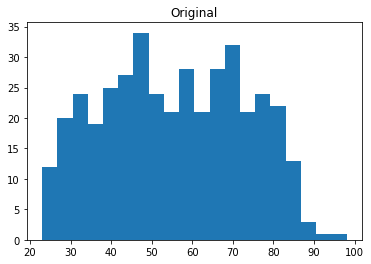

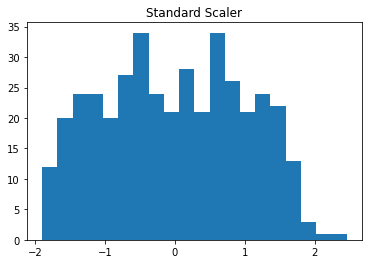

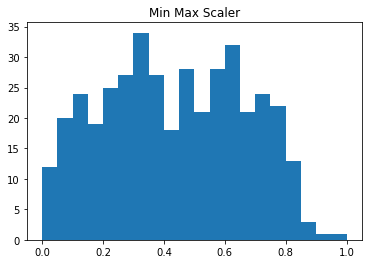

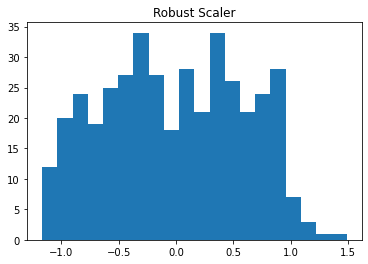

In [11]:
# visualize it!
for title, data in scalers.items():
    plt.hist(data, bins=20)
    plt.title(f"{title}")
    plt.show()

Are you thinking to yourself: "Hey - these all look the same."

**EXACTLY**

The point is that you change the scale on the X axis WITHOUT changing the shape of the data!

### Why do we need to use feature scaling?

- In order to compare the magnitude of coefficients thus increasing the interpretability of coefficients
- Handling disparities in units
- Some models use euclidean distance in their computations
- Some models require features to be on equivalent scales
- In the machine learning space, it helps improve the performance of the model and reducing the values/models from varying widely
- Some algorithms are sensitive to the scale of the data

### Let's Try It

In [24]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Income,Limit,Rating,Age
0,-0.861583,-0.489999,-0.465539,-1.257674
1,1.727437,0.828261,0.828703,1.528451
2,1.686756,1.014787,1.029311,0.889964
3,2.946152,2.068440,2.110003,-1.141586
4,0.302928,0.070012,0.013331,0.715831


In [26]:
X_scaled_df.describe()

,Income,Limit,Rating,Age
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,1.798561e-16,-1.598721e-16,1.554312e-17,1.776357e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-9.904743e-01,-1.683330e+00,-1.695069e+00,-1.896161e+00
25%,-6.878268e-01,-7.146973e-01,-6.968846e-01,-8.078311e-01
50%,-3.438443e-01,-4.906061e-02,-7.079503e-02,1.929972e-02
75%,3.480625e-01,4.932738e-01,5.326453e-01,8.319194e-01
max,4.017453e+00,3.980980e+00,4.057837e+00,2.457159e+00


In [27]:
model_scaled = sm.OLS(y, sm.add_constant(X_scaled_df))

In [28]:
results_scaled = model_scaled.fit()

results_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     705.6
Date:                Tue, 18 May 2021   Prob (F-statistic):          2.16e-178
Time:                        10:57:22   Log-Likelihood:                -2599.9
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     395   BIC:                             5230.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        520.0150      8.095     64.238      0.000     504.100     535.930
Income      -267.9676     13.436    -19.945      0.000    -294.382    -241.553
Limit        188.6483    102.843      1.834      0.067     -13.540     390.836
Rating       422.0883    102.662      4.111      0.000     220.255     623.921
Age          -14.7494      8.242     -1.789      0.074     -30.953       1.455
==============================================================================
Omnibus:                       94.733   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.919
Skew:                           1.374   Prob(JB):                     9.36e-37
Kurtosis:                       4.550   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluate:

What changed?

- R-squared didn't change, nor did p-values - but our coefficients across variables did!


### Now that we're ready to look at our inputs - how do we interpret these coefficients, or those p-values in the summary?

Discuss:

- If your underlying data (aka different X variables) are on the same scale, you can compare coefficients to see what is having the highest relative effect on y
    - In this instance, since we used a standard scaler - we can say that a one standard deviation increase in Income results in a 267 decrease in our y (Balance)

Wait... _decrease_? Why is a bigger income resulting in a smaller balance? Could very well be because we haven't yet explored model assumptions yet - so let's discuss those!

## The Assumptions of Linear Regression

Linear regression models have some underlying assumptions, mostly captured by the following points:

1. The true relationship is linear
2. No multicollinearity between independent variables
3. Errors are normally distributed with mean 0
4. Errors are homoskedastic (aka they have constant variance)
5. Errors are not correlated (no trends in error terms)


![the office "you're making some very dangerous assumptions" gif from gfycat](https://thumbs.gfycat.com/DarkParallelArizonaalligatorlizard-size_restricted.gif)

## Checking Each Assumption

### Linearity

Why do we assume linearity? Because, by modeling the relationship using _linear_ regression - if we don't think the relationship is linear, we probably should use a different model.

I'll note that linear regression can still handle curvature in the relationship using polynomial variables, interaction terms, etc (more on that in Topic 20) - but this assumption captures the idea that linear parameters (aka coefficients) can capture the relationship between X and y.

This assumption can be checked by using scatterplots - plotting the dependent variable against every independent variable.

In [30]:
X_cols

['Income', 'Limit', 'Rating', 'Age']

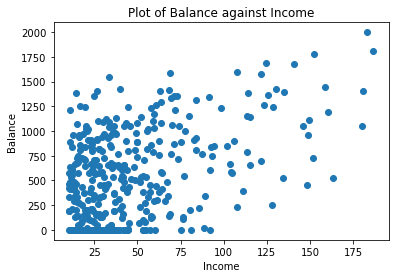

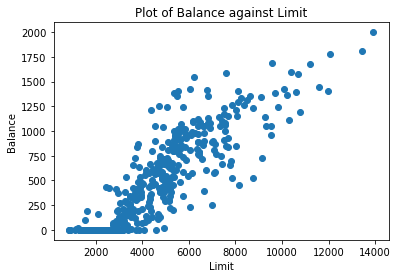

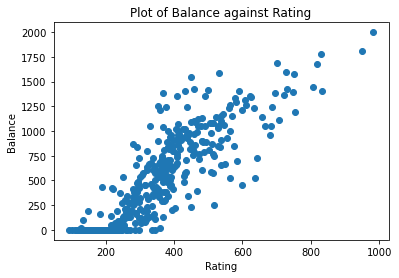

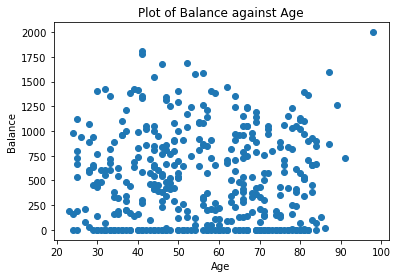

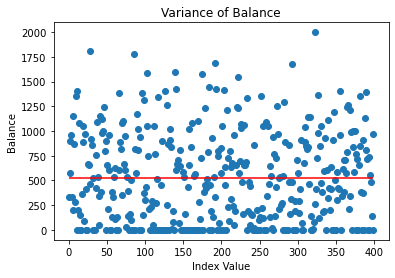

In [31]:
for x in X_cols:
    plt.scatter(df[x], df['Balance'])
    plt.title(f'Plot of Balance against {x}')
    plt.xlabel(x)
    plt.ylabel('Balance')
    plt.show()
    
# also plot sales against itself
plt.scatter(df.index, df['Balance'])
plt.hlines(df['Balance'].mean(), 0, df.index.max(), color='r')
plt.xlabel('Index Value')
plt.ylabel('Balance')
plt.title('Variance of Balance')
plt.show()

A quicker solution is to use Seaborn's `pairplot`.  

This lets us check for linearity and multicollinearity (the next assumption we'll check) at the same time.

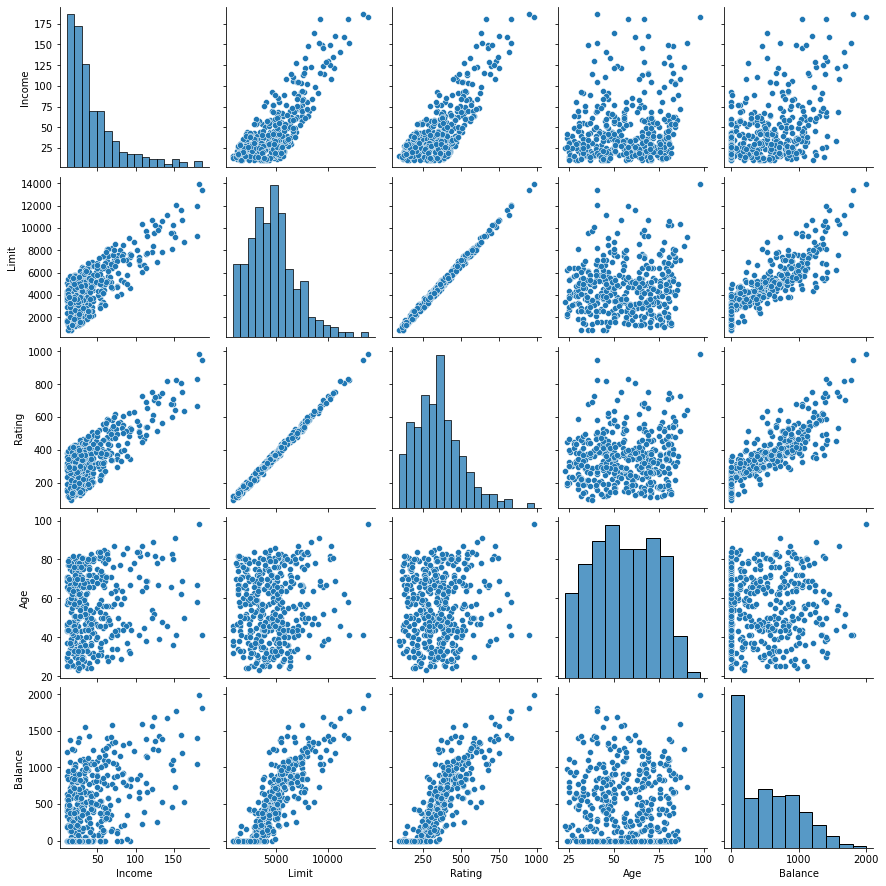

In [32]:
sns.pairplot(df)
plt.show()

#### Calculate Pearson's R Value

Pearson's R represents a correlation coefficient. 

In [33]:
# check correlations just against sales
df.corr().Balance.sort_values(ascending=False)

Balance    1.000000
Rating     0.863625
Limit      0.861697
Income     0.463656
Age        0.001835
Name: Balance, dtype: float64

### Multicollinearity

AKA when my X variables aren't actually independent - so that a model has trouble determining which change in what X variable is actually influencing `y`.

#### Directly Explore Correlations

In [34]:
# check all correlations using the same Pearson's correlation coefficient
df.corr()

,Income,Limit,Rating,Age,Balance
Income,1.000000,0.792088,0.791378,0.175338,0.463656
Limit,0.792088,1.000000,0.996880,0.100888,0.861697
Rating,0.791378,0.996880,1.000000,0.103165,0.863625
Age,0.175338,0.100888,0.103165,1.000000,0.001835
Balance,0.463656,0.861697,0.863625,0.001835,1.000000


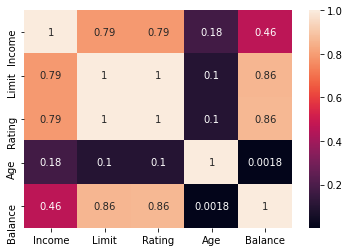

In [35]:
# can also visualize it
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Calculate the Variance Inflation Factor (VIF)

> "Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is **equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable**. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model."

-- Source: https://www.investopedia.com/terms/v/variance-inflation-factor.asp

In other words - how well does one of these X variables predict the others?

reference: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining a dataframe with just our X variables
X = df[X_cols]

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# label the scores with their related columns
vif["features"] = df[X_cols].columns

vif

,VIF,features
0,6.916450,Income
1,575.588362,Limit
2,625.267360,Rating
3,7.380815,Age


## Checking Residuals

By checking the residuals, aka the error between our actual y values and what we predicted, we can check that:

- Errors are normally distributed with mean 0
- Errors are homoskedastic (aka they have constant variance)
- Errors are not correlated (no trends in error terms)

In a nutshell:

<img src="images/error-dist.jpeg" width="550">  


#### Typical Residuals vs. Predictions plots:

- **The ideal scenario**

    - Random scatter
    - Scattered around 0
    - No identifiable trend
    
    <img src="images/normal-resid.png" width="550">  
    
- **Non-linear relationship**

    - Clear non-linear scatter, but
    - Identifiable trend
    - **Fix:** Introduce polynomial terms
    - **Fix:** Variable transformation
    
    <img src="images/polynomial-resid.png" width="550">

- **Autocorrelation**

    - Identifiable trend, or
    - Consecutively positive/negative residuals
    - **Fix:** Consider sequential analysis methods (which we'll discuss in phase 4)
    
    <img src="images/autocorrelation.png" width="550">

- **Heteroskedasticity**

    - The spread of residuals is different at different levels of the fitted values
    - **Fix:** Variable transformation (log)  
    
    <img src="images/heteroskedasticity.png" width="550">
    
The above plots were created using `seaborn.residplot` 

### Residual Plots

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)

preds = lr.predict(X)

In [41]:
from sklearn.metrics import r2_score

r2_score(y, preds)

0.8772342199048692

### Normality

There are several ways to test for normality.

In [42]:
residuals = y - preds

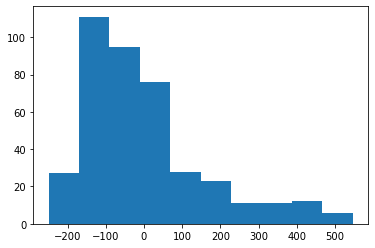

In [43]:
plt.hist(residuals)
plt.show()

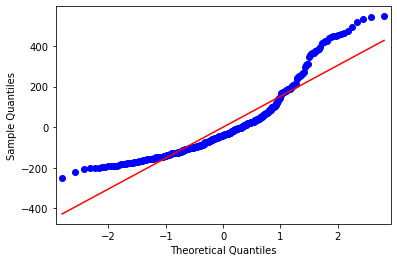

In [44]:
# QQ plots are generally great tools for checking for normality.
import statsmodels.api as sm

fig = sm.qqplot(residuals, line = 'r')

If you're just doing/exploring simple linear regression:

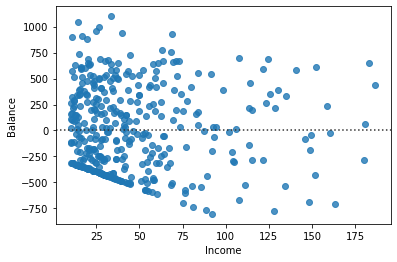

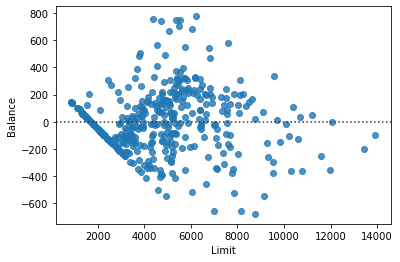

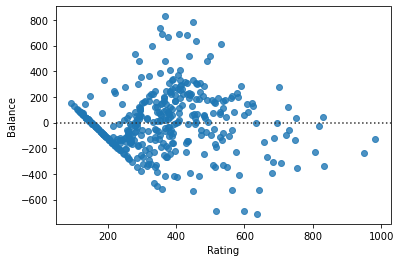

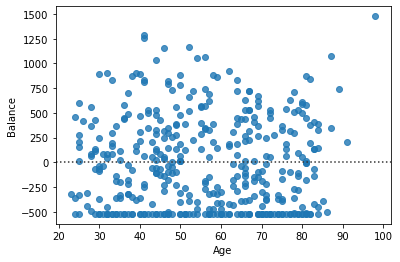

In [48]:
# note that these residplots only work for single variables

for x in X_cols:
    sns.residplot(x, "Balance", data=df)
    plt.show()

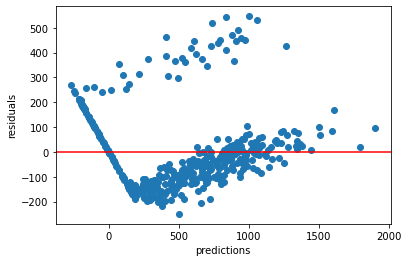

In [47]:
# for our full model
plt.scatter(preds, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

## Other Potential Problems

- Outliers

    <img src='images/outliers.png' width=450>

- High Leverage Points 

    <img src='images/leverage.png' width=450>

## So Let's Fix It!

What problems have we identified?

- 


How can we potentially fix them?

- 


### This Is Part 1....

In Part 2, we'll cover the assumptions of linear regression models, and how to check and transform to adapt to those assumptions. 

We'll table how to transform categorical variables to be able to be used in models until after the Winter Break, and cover that with Polynomial Regression in our Topic 20 study group!

### Additional Resources

- [Excellent statistical writeup about how to interpret Linear Regression coefficients, and their p-values](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/)

- [Detecting Multicollinearity with VIF](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)

- [Penn State Stats on Influential Points (outliers, high leverage points)](https://online.stat.psu.edu/stat462/node/87/) - this resource also allows easy access to the rest of their material on regression

- [Statsmodels' Documentation: Check the influence of outliers](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

- [Long blog post on regression diagnostics with implementation in python](http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/)

- [Statistics by Jim: Linear Regression Assumptions](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)